In [14]:
import matplotlib.pyplot as plt
import numpy as np

import os
from os.path import dirname

import csv

from pylab import rcParams
rcParams['figure.figsize'] = 16, 14

In [2]:
datadir = os.getcwd()

suffix = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-135']

datafile_input = []
for i in range(0 , len(suffix)):
    temp = '/ids_{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        input_1_20 = list(reader)
    datafile_input.append(input_1_20)
    
datafile_output = []
for i in range(0 , len(suffix)):
    temp = '/{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        output_1_20 = list(reader)
    datafile_output.append(output_1_20)   

In [3]:
#extract gaia source IDs from the input files
input_ids = []

for j in range(0, len(datafile_input)):
    input_idss = []
    for i in range(0, len(datafile_input[j])):
        input_idss.append(int(datafile_input[j][i][0].split(" ")[2]))
    input_ids.append(input_idss)

In [4]:
#extract gaia source IDs from the output files

output_ids = []

for j in range(0, len(datafile_output)):
    temp = [int(datafile_output[j][i][0]) for i in range(1,len(datafile_output[j]))]
    output_ids.append(temp)

In [5]:
#check if every pair of files (resp. first input and first output file) contain same IDs

for i in range(0, len(output_ids)):
    print(set(output_ids[i]) == set(input_ids[i]))

True
True
True
True
True
True
True


In [6]:
#now extract all data into lists

output_info = datafile_output[0][0]

In [9]:
output_all = []
for j in range(0, len(datafile_output)):
    print(j)
    for i in range(0, len(datafile_output[j])-1):
        print(i)
        temp = datafile_output[j][1:][i]
        output_all.append(temp)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [10]:
len(output_all)

135

In [11]:
output_info

['source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag']

In [12]:
sid = [int(output_all[i][0]) for i in range(0, len(output_all))]
ra = [float(output_all[i][1]) for i in range(0, len(output_all))]
dec = [float(output_all[i][3]) for i in range(0, len(output_all))]

magg = [float(output_all[i][11]) for i in range(0, len(output_all))]
fluxg = 10**(-0.4*np.array(magg))

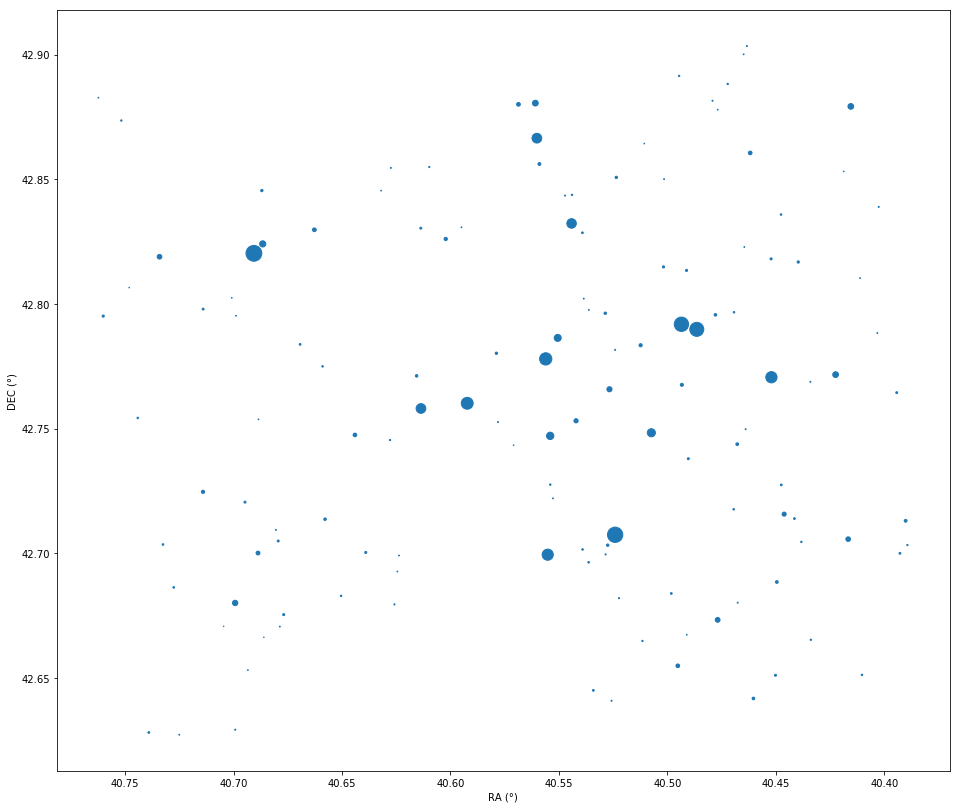

In [15]:
plt.scatter(ra, dec, s=fluxg*5e5)

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

In [16]:
#because an (or some) elements in the following lists is not a number we cant convert it yet into floats... 
pax = [output_all[i][5] for i in range(0, len(output_all))]
pmra = [output_all[i][7] for i in range(0, len(output_all))]
pmdec = [output_all[i][9] for i in range(0, len(output_all))]

In [17]:
pax

['1.6287698609118324',
 '1.9197179662586685',
 '0.06748575543337947',
 '0.063567935996442',
 '0.21262738738821776',
 '1.9241728596554344',
 '0.12676065081820995',
 '1.9354123349497458',
 '0.42580291980979273',
 '2.044822813443019',
 '1.8474051974283257',
 '0.4476914871729625',
 '1.9645703081633947',
 '0.8864090238434617',
 '1.9247322163187504',
 '1.8316025896996864',
 '1.869347883176732',
 '4.05347427483112',
 '1.9320062422036073',
 '1.9384072433612825',
 '2.065232055476835',
 '0.9529771049304052',
 '2.018797453476119',
 '1.6309687418784287',
 '1.9607019124010625',
 '1.9550591830852988',
 '0.5290756432404508',
 '1.9909942308725241',
 '0.19876120048106344',
 '1.822668727318403',
 '0.33427290510370955',
 '1.9237394999405244',
 '1.9940473887488166',
 '1.8719566902184155',
 '0.7630712946701596',
 '1.995245287858631',
 '2.0939829213874015',
 '2.131796813153491',
 '2.319287905566082',
 '2.2683620127239403',
 '1.9894846078677952',
 '1.1279939968175305',
 '1.8848438799000808',
 '0.018877809751

In [18]:
'' in pax

True

In [19]:
for i in range(0, len(pax)):
    if pax[i] == '':
        print(i)    
    if pmra[i] == '':
        print(i)
    if pmdec[i] == '':
        print(i)
    

132
132
132


In [20]:
# star 133 resp. element 132 has no pax, pmra & pmdec!
# so the star will be removed from all lists

In [23]:
def remove_element(lst ,index):
    new_lst = lst[:index] + lst[index+1 :]
    return new_lst

In [25]:
#remove element 132:

sid_new = remove_element(sid, 132)
ra_new = remove_element(ra, 132)
dec_new = remove_element(dec, 132)

magg_new = remove_element(magg, 132)
fluxg = fluxg.tolist()
fluxg_new = remove_element(fluxg, 132)

pax_new = remove_element(pax, 132)
pmra_new = remove_element(pmra, 132)
pmdec_new = remove_element(pmdec, 132)

#convert pax & pms into floats

pax_new = [float(i) for i in pax_new]
pmra_new = [float(i) for i in pmra_new]
pmdec_new = [float(i) for i in pmdec_new]

In [26]:
pax_new

[1.6287698609118324,
 1.9197179662586685,
 0.06748575543337947,
 0.063567935996442,
 0.21262738738821776,
 1.9241728596554344,
 0.12676065081820995,
 1.9354123349497458,
 0.42580291980979273,
 2.044822813443019,
 1.8474051974283257,
 0.4476914871729625,
 1.9645703081633947,
 0.8864090238434617,
 1.9247322163187504,
 1.8316025896996864,
 1.869347883176732,
 4.05347427483112,
 1.9320062422036073,
 1.9384072433612825,
 2.065232055476835,
 0.9529771049304052,
 2.018797453476119,
 1.6309687418784287,
 1.9607019124010625,
 1.9550591830852988,
 0.5290756432404508,
 1.9909942308725241,
 0.19876120048106344,
 1.822668727318403,
 0.33427290510370955,
 1.9237394999405244,
 1.9940473887488166,
 1.8719566902184155,
 0.7630712946701596,
 1.995245287858631,
 2.0939829213874015,
 2.131796813153491,
 2.319287905566082,
 2.2683620127239403,
 1.9894846078677952,
 1.1279939968175305,
 1.8848438799000808,
 0.018877809751093988,
 1.9826352331082204,
 2.0191368985614155,
 0.47353178728909706,
 1.903403206058

In [27]:
def arrows(x, y, pm_x, pm_y, scale):
    temp = []
    for i in range(0, len(x)):
        temp2 = [x[i], y[i], scale * pm_x[i], scale * pm_y[i]]
        temp.append(temp2)
    return np.array(temp)

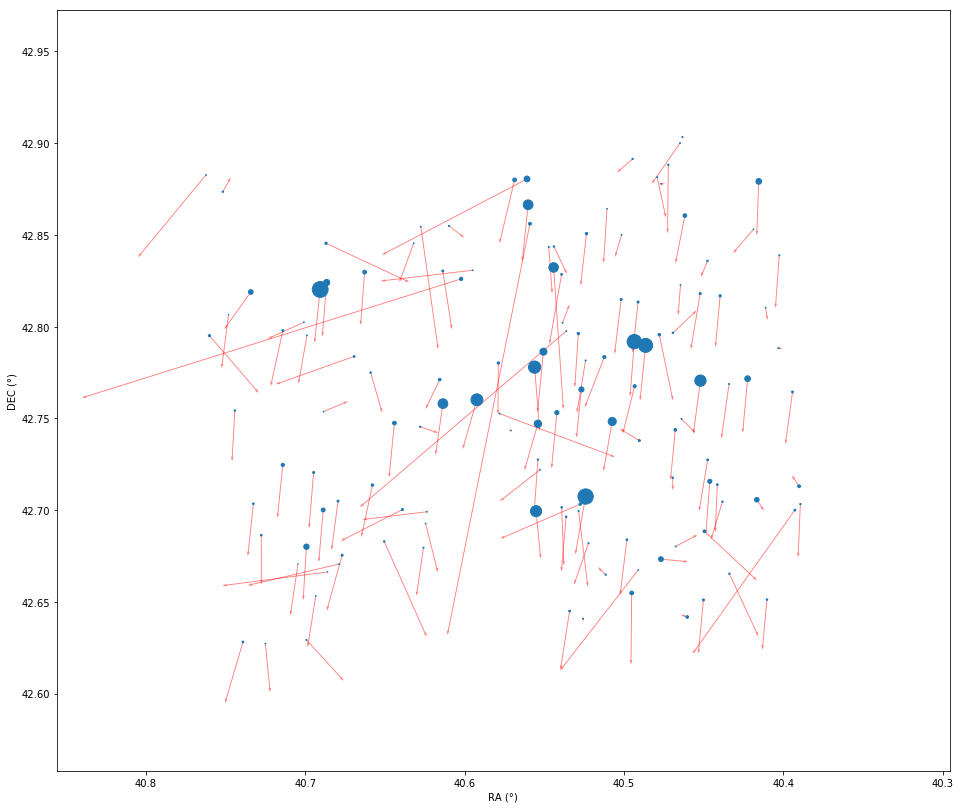

In [28]:
import numpy as np
import matplotlib.pyplot as plt

soa = arrows(ra_new, dec_new, pmra_new, pmdec_new, 0.005)


X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

In [29]:
# convert parallaxes into parsecs
parcs = 1000/np.array(pax_new)

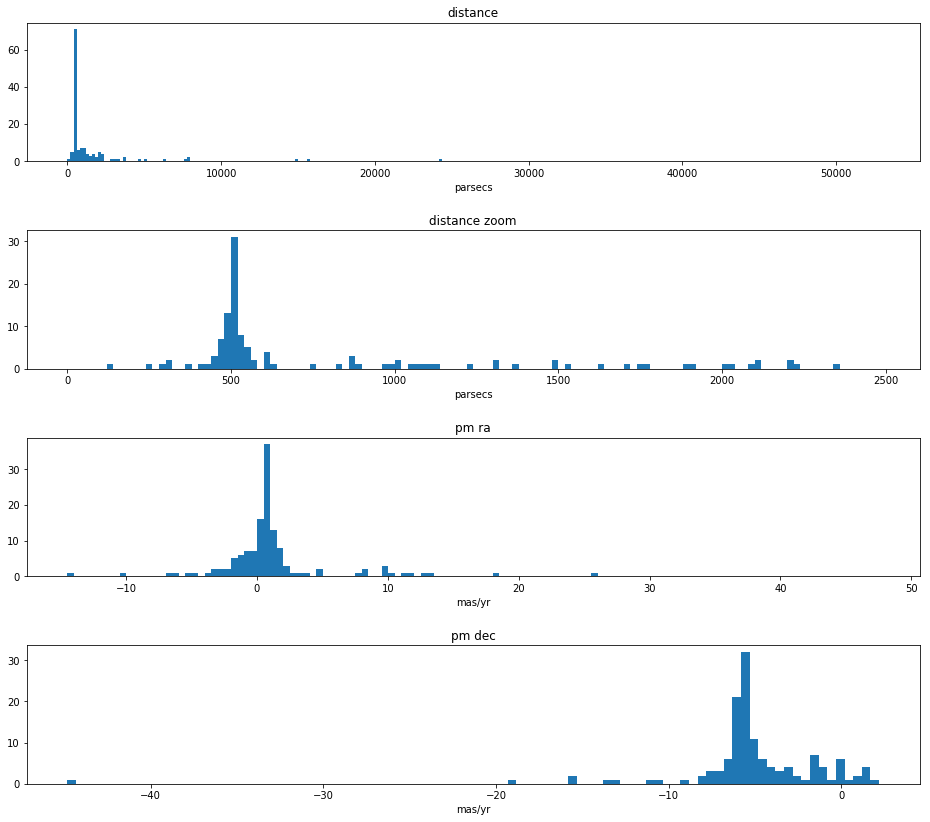

In [65]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
bottom = 0.1
ax1.hist(parcs, bins=np.arange(0,max(parcs)+10,200))
ax2.hist(parcs, bins=np.arange(0,2500,20))
ax3.hist(pmra_new, bins=np.arange(min(pmra_new),max(pmra_new),0.5))
ax4.hist(pmdec_new, bins=np.arange(min(pmdec_new),max(pmdec_new),0.5))

ax1.set_title('distance')
ax2.set_title('distance zoom')
ax3.set_title('pm ra')
ax4.set_title('pm dec')

ax1.set_xlabel('parsecs')
ax2.set_xlabel('parsecs')
ax3.set_xlabel('mas/yr')
ax4.set_xlabel('mas/yr')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [66]:
mask_cluster = []
for i in range(0, len(parcs)):
    mask_cluster.append(400<=parcs[i]<=600)

In [67]:
mask_cluster

[False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False]

In [68]:
from itertools import compress
ra_cl = list(compress(ra_new, mask_cluster))
dec_cl = list(compress(dec_new, mask_cluster))

pmra_new_cl = list(compress(pmra_new, mask_cluster))
pmdec_new_cl = list(compress(pmdec_new, mask_cluster))
parcs_cl = list(compress(parcs, mask_cluster))

fluxg_cl = list(compress(fluxg_new, mask_cluster))

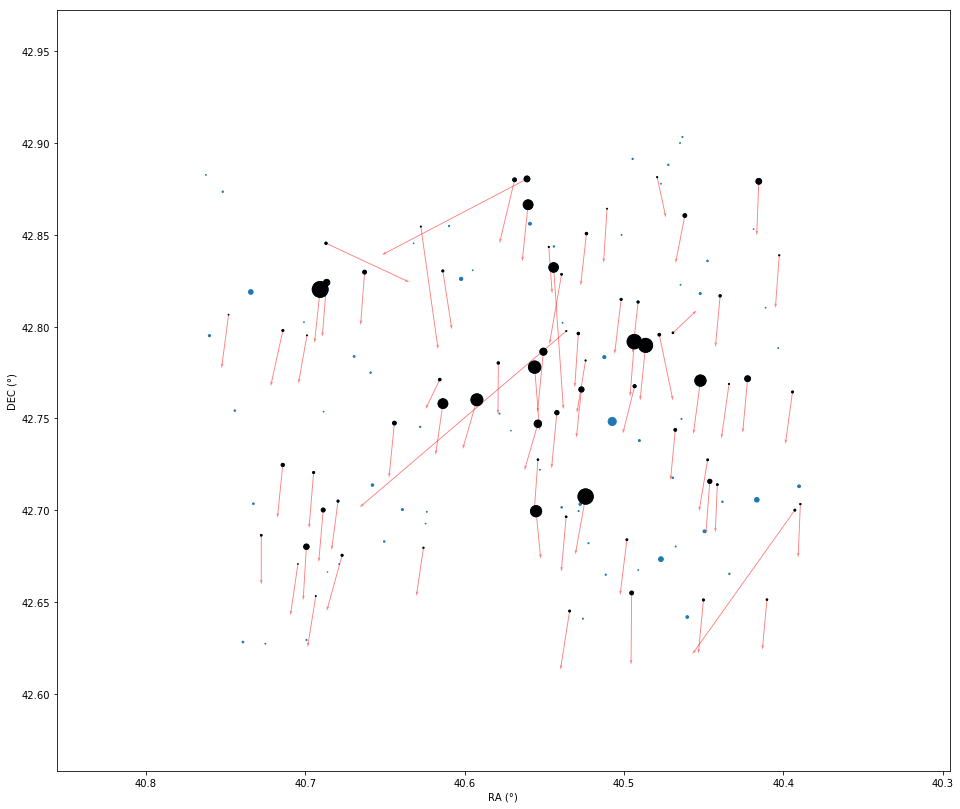

In [69]:
import numpy as np
import matplotlib.pyplot as plt

soa = arrows(ra_cl, dec_cl, pmra_new_cl, pmdec_new_cl, 0.005)


X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)
ax.scatter(ra_cl, dec_cl, s=np.array(fluxg_cl)*5e5,c='k')

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

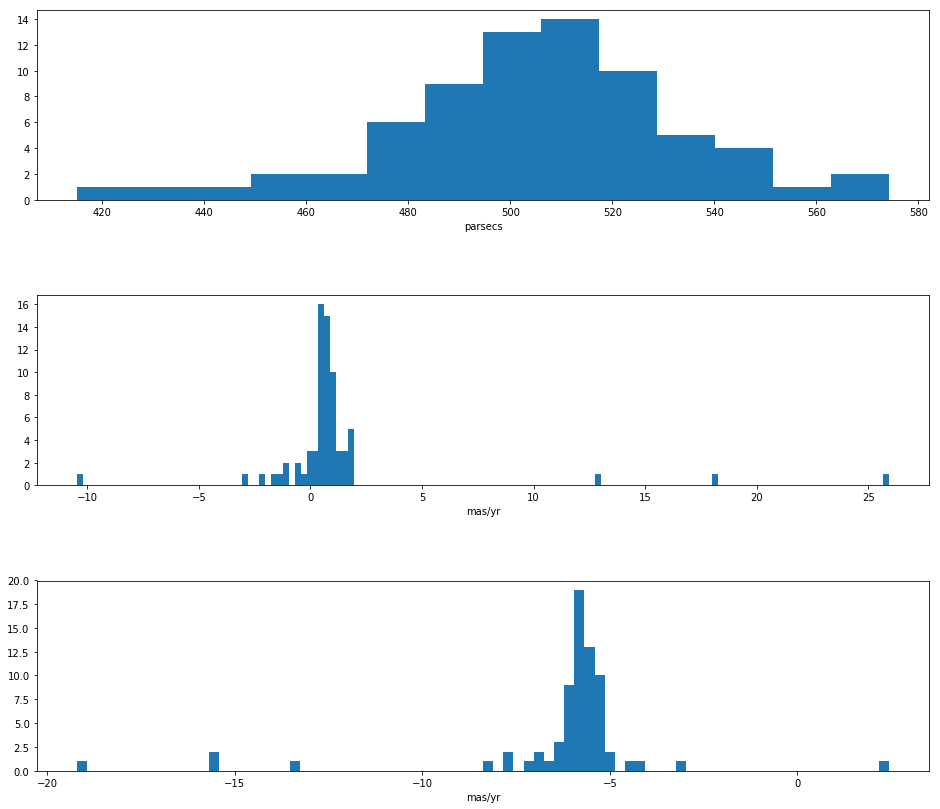

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

_,bins, __ = ax1.hist(parcs_cl, bins=14)#np.arange(400,600,20)
ax2.hist(pmra_new_cl, bins='auto') #np.arange(min(pmra_new_cl),max(pmra_new_cl),0.2)
ax3.hist(pmdec_new_cl, bins='auto') #np.arange(min(pmdec_new_cl),max(pmdec_new_cl),0.2)

ax1.set_xlabel('parsecs')
ax2.set_xlabel('mas/yr')
ax3.set_xlabel('mas/yr')

plt.subplots_adjust(hspace=0.5)

plt.show()